# Homework 3
###### by Mher Movsisyan
---

### Problem 1. (5 points)  
Get basic statistical and descriptive information about the features in the dataset. Clean/manipulate and prepare your data for further analysis.

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel("Walmart Sales.xlsx", parse_dates=["Purchase_Date"])
df

,CustomerID,Purchase_Date,Quantity,UnitPrice,Gender,City,Age,MonthlyIncome,Product_Name
0,C53563,2021-03-24,3,643,Male,Denver,33,4980,Washing machine
1,C39154,2021-03-23,1,569,Female,San Diego,27,7141,Mobile phone
2,C39154,2021-03-30,2,69,Female,San Diego,27,7141,Pet food
3,C39154,2021-09-19,10,105,Female,San Diego,27,7141,Vitamin
4,C39154,2021-02-08,1,521,Female,San Diego,27,7141,Mobile phone
...,...,...,...,...,...,...,...,...,...
124274,C46189,2021-06-28,10,3,Female,Boston,26,6113,Clothing
124275,C46189,2021-06-26,3,483,Female,Boston,26,6113,Mobile phone
124276,C46189,2021-03-13,4,39,Female,Boston,26,6113,Plants
124277,C52591,2021-03-14,6,36,Female,San Diego,67,2702,Pet food


In [78]:
df.dtypes

CustomerID               object
Purchase_Date    datetime64[ns]
Quantity                  int64
UnitPrice                 int64
Gender                   object
City                     object
Age                       int64
MonthlyIncome             int64
Product_Name             object
dtype: object

In [79]:
df.describe(datetime_is_numeric=True)

,Purchase_Date,Quantity,UnitPrice,Age,MonthlyIncome
count,124279,124279.000000,124279.000000,124279.000000,124279.000000
mean,2021-05-17 08:21:35.639649280,4.505958,196.565268,51.284835,5720.114637
min,2021-01-01 00:00:00,1.000000,3.000000,18.000000,2501.000000
25%,2021-03-10 00:00:00,2.000000,47.000000,36.000000,4086.000000
50%,2021-05-17 00:00:00,4.000000,91.000000,51.000000,5847.000000
75%,2021-07-25 00:00:00,7.000000,391.000000,67.000000,7263.000000
max,2021-09-30 00:00:00,10.000000,699.000000,83.000000,8997.000000
std,NaN,2.926061,216.382188,18.885571,1853.693784


In [80]:
len(df.CustomerID.unique())

4276

In [81]:
df.isna().sum()

CustomerID       0
Purchase_Date    0
Quantity         0
UnitPrice        0
Gender           0
City             0
Age              0
MonthlyIncome    0
Product_Name     0
dtype: int64

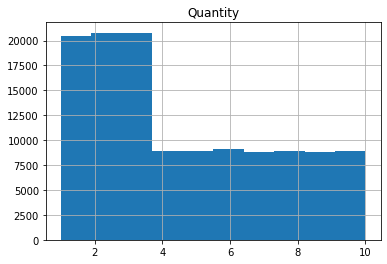

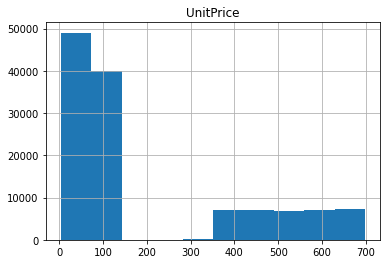

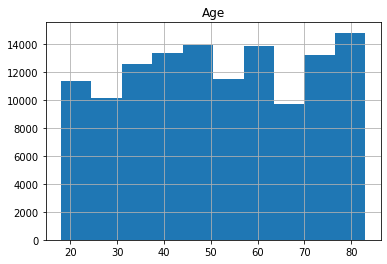

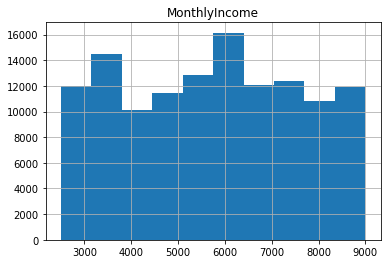

In [82]:
for col in ["Quantity", "UnitPrice", "Age", "MonthlyIncome"]:
    df[col].hist()
    plt.title(col)
    plt.show() 

### Problem 2. (30 points)  
For the RFM Analysis, calculate the necessary metrics. Rank and normalize your data accordingly for each metric. Weight your calculated metrics so that recency and frequency have 0.2 weight each, and monetary has 0.6 weight. Divide your final RFM score into 4 groups so that if:  
- RFM score < 25 then ‘Leaving customers’  
- RFM score >= 25 and< 50 then ‘Risky customers’  
- RFM score >= 50 and< 75 then ‘Potential Loyalists’  
- RFM score >= 75 then ‘Champions’  

Plot a bar chart to show the number of customers in each group by gender. Provide an interpretation of your results.

In [83]:
df["value"] = df.Quantity * df.UnitPrice
grp = df.groupby("CustomerID")
recency = grp.Purchase_Date.max() - df.Purchase_Date.max()
frequency = grp.Purchase_Date.unique().apply(len)
monetary = grp.value.sum()
ranking = pd.DataFrame(monetary)
ranking["recency"] = recency
ranking["frequency"] = frequency
ranking

,value,recency,frequency
CustomerID,,,
C37051,307,-86 days,2
C37054,26888,-2 days,46
C37057,5182,-61 days,11
C37060,13406,-30 days,23
C37063,1678,-6 days,2
...,...,...,...
C54853,2778,-121 days,4
C54856,954,-53 days,2
C54859,5526,-7 days,5


In [84]:
for col in ranking.columns:
    ranking[col+"_rank"] = pd.cut(ranking[col], bins=[ranking[col].min() - abs(ranking[col].min())] + [np.quantile(ranking[col], q) for q in [0.25, 0.5, 0.75, 1]], labels=False) + 1
ranking

,value,recency,frequency,value_rank,recency_rank,frequency_rank
CustomerID,,,,,,
C37051,307,-86 days,2,1,1,1
C37054,26888,-2 days,46,4,4,4
C37057,5182,-61 days,11,2,1,2
C37060,13406,-30 days,23,3,2,3
C37063,1678,-6 days,2,1,3,1
...,...,...,...,...,...,...
C54853,2778,-121 days,4,1,1,1
C54856,954,-53 days,2,1,1,1
C54859,5526,-7 days,5,2,3,1


In [85]:
ranking["total"] = np.array(ranking.value_rank * 0.6 + ranking.recency_rank * 0.2 + ranking.frequency_rank * 0.2)
ranking

,value,recency,frequency,value_rank,recency_rank,frequency_rank,total
CustomerID,,,,,,,
C37051,307,-86 days,2,1,1,1,1.0
C37054,26888,-2 days,46,4,4,4,4.0
C37057,5182,-61 days,11,2,1,2,1.8
C37060,13406,-30 days,23,3,2,3,2.8
C37063,1678,-6 days,2,1,3,1,1.4
...,...,...,...,...,...,...,...
C54853,2778,-121 days,4,1,1,1,1.0
C54856,954,-53 days,2,1,1,1,1.0
C54859,5526,-7 days,5,2,3,1,2.0


In [86]:
ranking["total_rank"] = pd.cut(ranking["total"], bins=[ranking["total"].min() - abs(ranking["total"].min())] + [np.quantile(ranking["total"], q) for q in [0.25, 0.5, 0.75, 1]], labels=False) + 1
ranking["total_rank"]

CustomerID
C37051    1
C37054    4
C37057    2
C37060    3
C37063    1
         ..
C54853    1
C54856    1
C54859    2
C54862    4
C54874    3
Name: total_rank, Length: 4276, dtype: int64

In [87]:
ranking.total_rank.value_counts()

1    1119
4    1069
3    1065
2    1023
Name: total_rank, dtype: int64

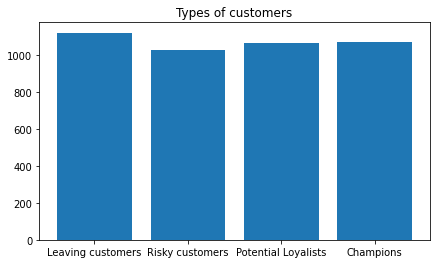

In [88]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(x=["Leaving customers", "Risky customers", "Potential Loyalists", "Champions"], height=ranking.total_rank.value_counts()[[1, 2, 3, 4]])
ax.set_title("Types of customers");

Here, since we see that each group has practically the same number of observations. This is explained by the way we grouped together the customers. Since we took the weighted average of R, F, and M rankings for the total rank which themselves are a quantile-based binning of the original measurements too, we get this useless result. I wouldn't use this plot or these groupings for my businesses, neither should anyone.

### Problem 3. (25 points)  
For the K-Means clustering analysis use the following columns to cluster the customers into groups:  
`Recency, Frequency, Monetary, Age, MonthlyIncome`  
Use Elbow and Silhouette_score to find the optimal number of clusters. Provide an
interpretation of your findings.

In [89]:
ranking["age"] = grp.Age.last()
ranking["income"] = grp.MonthlyIncome.last()
ranking.recency = ranking.recency.dt.days
clustering_df = ranking[["value", "frequency", "recency", "age", "income"]].copy()
clustering_df

,value,frequency,recency,age,income
CustomerID,,,,,
C37051,307,2,-86,80,4560
C37054,26888,46,-2,66,4558
C37057,5182,11,-61,31,3699
C37060,13406,23,-30,40,7941
C37063,1678,2,-6,36,6187
...,...,...,...,...,...
C54853,2778,4,-121,50,3034
C54856,954,2,-53,22,7315
C54859,5526,5,-7,35,2875


We need to space to have an unbiased distance estimator.

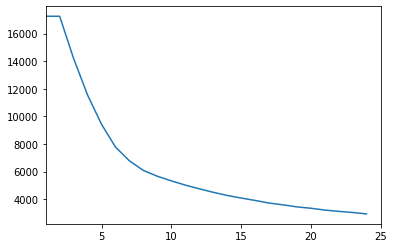

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

ss = StandardScaler()
clustering_df = ss.fit_transform(clustering_df)

inertias = []
sils=[]

for i in range(2, 25):
    model = KMeans(i, random_state=172)
    labels = model.fit_predict(clustering_df)
    sils.append(silhouette_score(clustering_df, labels))
    inertias.append(model.inertia_)
    plt.xlim(1, 25)
    
plt.plot([inertias[0]]*2 + inertias);

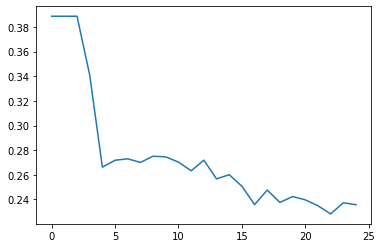

In [91]:
plt.plot([sils[0]]*2 + sils);

We see the curve bend most at around 8 clusters in the inertia elbow plot.

### Problem 4. (40 points)  
For the Linear Regression, use the following features to predict Monetary value:  
```
Recency, Frequency, Age, MonthlyIncome, Gender, City
```

Divide the dataset into train/test (set test size 0.25).  
Which features are significant?
Check all the assumptions. Provide a conclusion of your findings.

Answer:  
Usually I would log the MonthlyIncome, but it has a uniform distribution in this case.

In [92]:
ranking["gender"] = grp.Gender.last()
ranking["city"] = grp.City.last()

ohe = OneHotEncoder(drop="first", sparse=False)
hotted_gender = pd.DataFrame(ohe.fit_transform(ranking[["gender"]]), columns=["male"], index=ranking.index)

ohe = OneHotEncoder(drop="first", sparse=False)
hotted_city = pd.DataFrame(ohe.fit_transform(ranking[["city"]]), columns=["Boston", "Chicago", "Denver", "SanDiego"], index=ranking.index)

In [93]:
ss = StandardScaler()
cols = ["frequency", "recency", "age", "income"]
lin_df = pd.DataFrame(ss.fit_transform(ranking[cols]), columns=cols, index=ranking.index)

In [94]:
(lin_df := pd.concat([hotted_gender, hotted_city, lin_df, ranking["value"]], axis=1))

,male,Boston,Chicago,Denver,SanDiego,frequency,recency,age,income,value
CustomerID,,,,,,,,,,
C37051,1.0,0.0,0.0,1.0,0.0,-0.745013,-1.316937,1.567915,-0.634165,307
C37054,1.0,0.0,1.0,0.0,0.0,0.735273,0.606819,0.826799,-0.635238,26888
C37057,0.0,0.0,1.0,0.0,0.0,-0.442228,-0.744391,-1.025993,-1.096145,5182
C37060,0.0,0.0,0.0,0.0,1.0,-0.038513,-0.034433,-0.549561,1.179950,13406
C37063,0.0,1.0,0.0,0.0,0.0,-0.745013,0.515212,-0.761308,0.238821,1678
...,...,...,...,...,...,...,...,...,...,...
C54853,0.0,0.0,0.0,1.0,0.0,-0.677728,-2.118502,-0.020192,-1.452958,2778
C54856,0.0,0.0,1.0,0.0,0.0,-0.745013,-0.561176,-1.502425,0.844063,954
C54859,1.0,0.0,1.0,0.0,0.0,-0.644085,0.492310,-0.814245,-1.538271,5526


In [95]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(lin_df, test_size=0.25)

In [96]:
import statsmodels.api as sm

model = sm.OLS(train_df["value"], sm.add_constant(train_df[train_df.columns.difference(set(['value']))]))
results = model.fit()

results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.582     
Dependent Variable: value            AIC:                74112.4958
Date:               2022-11-21 23:24 BIC:                74173.2267
No. Observations:   3207             Log-Likelihood:     -37046.   
Df Model:           9                F-statistic:        497.3     
Df Residuals:       3197             Prob (F-statistic): 0.00      
R-squared:          0.583            Scale:              6.3467e+08
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     17051.7711 1094.6219 15.5778 0.0000 14905.5391 19198.0031
Boston    -1028.3163 1409.6744 -0.7295 0.4658 -3792.2737  1735.6411
Chicago    -550.9737 1404.3352 -0.3923 0.6948 -3304.4625  2202.5151
Denver    -1727.7258 1428.7123 -1.2093 0.2266 -4529.0110  1073.5594
SanDiego   -458.0725 1392.7920 -0.3289 0.7423 -3188.9286  2272.7835
age          27.4874  445.7435  0.0617 0.9508  -846.4846   901.4595
frequency 30943.6367  479.4462 64.5404 0.0000 30003.5836 31883.6899
income      -89.5581  444.5327 -0.2015 0.8403  -961.1562   782.0400
male        249.4657  890.5034  0.2801 0.7794 -1496.5500  1995.4813
recency   -3479.2932  482.4945 -7.2111 0.0000 -4425.3231 -2533.2633
-------------------------------------------------------------------
Omnibus:           8136.756     Durbin-Watson:        2.016        
Prob(Omnibus):     0.000        Jarque-Bera (JB):     115360667.977
Skew:              27.796       Prob(JB):             0.000        
Kurtosis:          930.484      Condition No.:        7            
===================================================================

"""

Here we see that only the frequency and recency variables are significant in determining monetary value

In [99]:
(error := np.mean(np.abs(model.predict(results.params, sm.add_constant(test_df[test_df.columns.difference(set(['value']))])) - test_df["value"])))

6569.827157076798